<center><h3>Блок 1. Модуль PYTHON-13. Визуализация данных.</h3>
Закрепление знаний</center>

In [20]:
# общий блок
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt



churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns='RowNumber')

<center>Задание 9.1 Соотношение ушедших и лояльных клиентов.</center>

In [13]:
churn_group_1 = churn_data.copy() # создание копии данных

labels = ['Лояльный клиент','Ушедший клиент'] # категории
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values = churn_group_1['Exited'].value_counts(),
    textinfo='label+percent'
)]) # создание круговой диаграммы
fig.update_layout(title_text='Соотношение лояльных и ушедших клиентов',title_x=0.5) # добавление заголовка диаграммы
fig.show() # вывод диаграммы

Соотношение лояльных и ушедших клиентов примерно равно 4:1.
На основании диаграммы можно сделать пока только один вывод: количество ушедших клиентов чуть больше 20%. Показатель не является критическим, но причины такого оттока клиентов требуют дополнительного исследования.

<center>Задание 9.2 Распределение баланса пользователей, у которых на счету больше 2 500 долларов</center>

In [14]:
churn_group_1 = churn_data.copy() # создание копии данных

box_data = churn_group_1[churn_group_1['Balance'] > 2500][['Balance','CustomerId']] # выборка данных по уровню баланса с сохранением только необходимых столбцов

fig = px.box(data_frame=box_data, x='Balance') # построение коробчатой диаграммы
fig.update_layout(title_text='Распределение баланса пользователей, у которых на счету больше 2 500 долларов',title_x=0.5) # заголовок
fig.show()

Для получения наглядной картины распределения баланса пользователей, у которых на счету больше 2 500 долларов, лучше всего подходит коробчатая диаграмма.
Из данной диаграммы можно сделать следующие выводы:
1. медианное значение баланса равно примерно $120k и находится практически на одинаковом расстоянии от границ коробки (Q<sub>25</sub> = $100k и Q<sub>75</sub> = $140k); 
2. межквартильный размах составляет $40k;
3. усы коробки имеют практически одинаковую длину ($39k);
4. с некоторой погрешностью можно говорить о нормальном распределении баланса пользователей с поправкой на дискретный характер данных;
5. потенциальные выбросы имеются, но большая их часть вплотную примыкает к усам коробки, что не позволяет отнести их однозначно к аномалиям и исключить из рассмотрения без дополнительного исследования;
6. из диаграммы можно сделать вывод, что половина клиентов имеет на счету средства, лежащие в достаточно узком диапазоне от $100k до $140k.

<center>Задание 9.3 Распределение баланса пользователей в разрезе признака оттока</center>

In [15]:
churn_group_1 = churn_data.copy() # создание копии данных

box_data = churn_group_1[['Exited','Balance']] # выборка данных по уровню баланса с сохранением только необходимых столбцов

fig = go.Figure()
fig.add_trace(go.Box(x=box_data[box_data['Exited'] == 0]['Balance'], name='Остались'))
fig.add_trace(go.Box(x=box_data[box_data['Exited'] == 1]['Balance'], name='Ушли'))
fig.update_layout(title="Распределение баланса пользователей в разрезе признака оттока",
                  yaxis_title="Вид пользователя",
                  xaxis_title="Баланс")
fig.show()

box_data_1 = churn_group_1[churn_group_1['Balance'] > 2500][['Exited','Balance']] # выборка данных по уровню баланса с сохранением только необходимых столбцов

fig1 = go.Figure()
fig1.add_trace(go.Box(x=box_data_1[box_data_1['Exited'] == 0]['Balance'], name='Остались'))
fig1.add_trace(go.Box(x=box_data_1[box_data_1['Exited'] == 1]['Balance'], name='Ушли'))
fig1.update_layout(title="Распределение баланса пользователей в разрезе признака оттока (баланс > $2 500)",
                  yaxis_title="Вид пользователя",
                  xaxis_title="Баланс")
fig1.show()


Для получения наглядной картины распределения баланса пользователей в разрезе признака оттока лучше всего подходит коробчатая диаграмма.
Из данной диаграммы можно сделать следующие выводы:
1. медианное значение баланса лояльных клиентов равно примерно $92k и находится ближе к правой границе коробки (Q<sub>25</sub> = $0 и Q<sub>75</sub> = $126k); 
2. медианное значение баланса ушедших клиентов равно примерно $109k и находится ближе к правой границе коробки (Q<sub>25</sub> = $38k и Q<sub>75</sub> = $131k); 
3. из диаграммы можно сделать вывод, что лояльные клиенты имеют меньший баланс, чем ушедшие;
4. можно предположить, что банк предлагает услуги, ориентированные на клментов, имеющих небольшой баланс, для крупных клиентов услуги банка менее интересны;
5. картина сильно изменится, если убрать из рассмотрения клиентов, чей баланс менее $2 500, в этом случае сожно заметить только, что ушедшие клиенты в основной своей массе сосредоточены в более узком диапазоне баланса.
 

<center>Задание 9.4 Распределение возраста пользователей в разрезе признака оттока</center>

In [16]:
churn_group_1 = churn_data.copy() # создание копии данных

box_data = churn_group_1[['Exited','Age']]

fig = go.Figure()
fig.add_trace(go.Box(x=box_data[box_data['Exited'] == 0]['Age'], name='Остались'))
fig.add_trace(go.Box(x=box_data[box_data['Exited'] == 1]['Age'], name='Ушли'))
fig.update_layout(title="Распределение возраста пользователей в разрезе признака оттока",
                  yaxis_title="Вид пользователя",
                  xaxis_title="Возраст")
fig.show()


Для получения наглядной картины распределения возраста пользователей в разрезе признака оттока лучше всего подходит коробчатая диаграмма.
Из данной диаграммы можно сделать следующие выводы:
1. медианное значение возраста лояльных клиентов равно 36 лет и находится на одинаковом расстоянии от границ коробки (Q<sub>25</sub> = 31 и Q<sub>75</sub> = 41); 
2. медианное значение возраста ушедших клиентов равно 45 лет и находится чуть ближе к правой границе коробки (Q<sub>25</sub> = 38 и Q<sub>75</sub> = 51); 
3. из диаграммы можно сделать вывод, что услуги банка более интересны молодым клиентам;
4. банку следует обратить внимание на категории клиентов старше 41 года;
5. можно заметить, что при удалении из рассмотрения клиентов с небольшим балансом (до $2 500) картина не меняется.

<center>Задание 9.5 Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты</center>

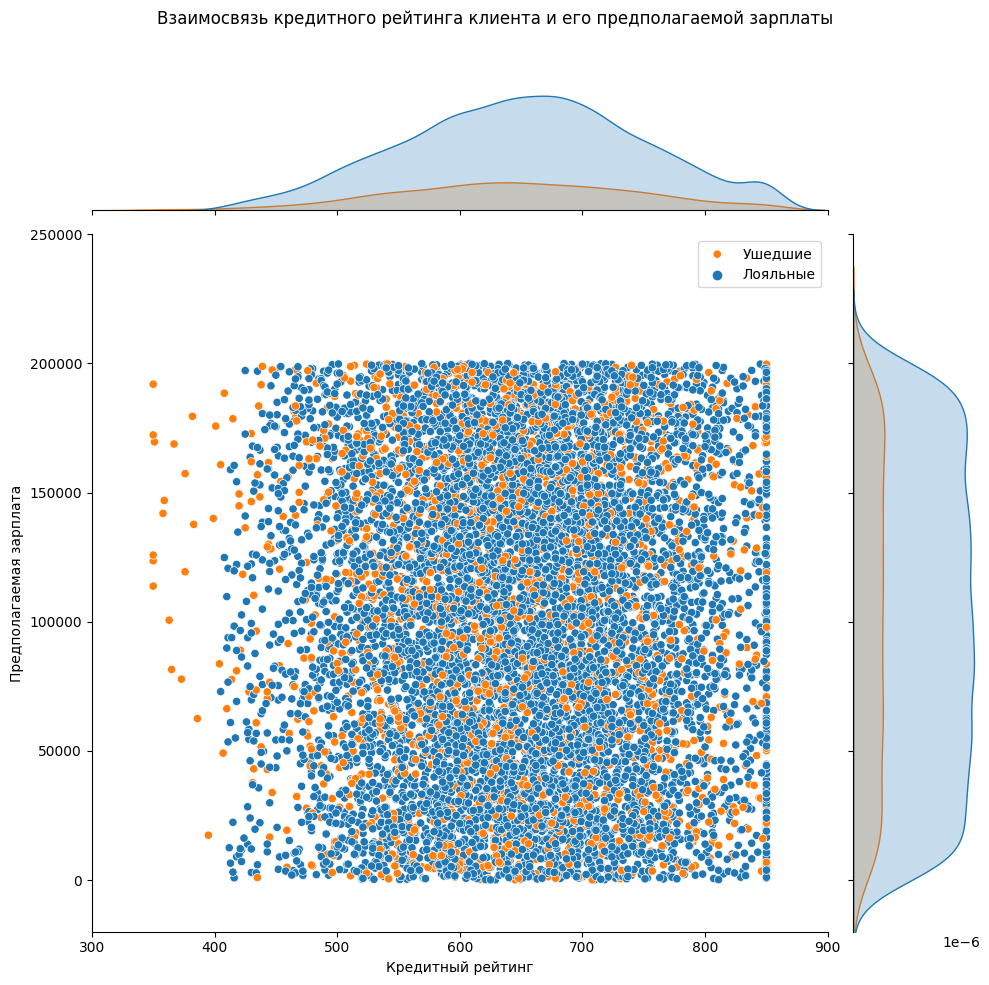

In [17]:
churn_group_1 = churn_data.copy() # создание копии данных

fig = sns.jointplot(
    data=churn_group_1,
    x='CreditScore',
    y='EstimatedSalary',
    xlim=(300,900),
    ylim=(-20000,250000),
    hue='Exited',
    height=10
)
fig.ax_joint.legend(['Ушедшие','Лояльные'])
fig.ax_joint.set_xlabel('Кредитный рейтинг')
fig.ax_joint.set_ylabel('Предполагаемая зарплата')
fig.fig.suptitle('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.subplots_adjust(top=0.9)
plt.show()

Для получения наглядной картины распределения возраста пользователей в разрезе признака оттока лучше всего подходит диаграмма рассеяния.
Из данной диаграммы можно сделать следующие выводы:
1. большинство клиентов имеют кредитный рейтинг более 500;
2. самый низкий рейтинг имеют ушедшие клиенты (<400);
3. максимальное количество лояльных клиентов имеют рейтинг, равный примерно 680;
4. для ушедших клиентов пик кредитного рейтинга немного ниже аналогичного пика для лояльных клиентов, он выражен менее явно и раавняется примерно 630;
5. уровень предполагаемой зарплаты не имеет видимой взаимосвязи с кредитным рейтингом, это верно и для лояльных, и для ушедших клиентов;
6. из диаграммы не просматривается взаимосвязь между кредитным рейтингом и предполагаемой зарплатой, и это верно как для лояльных, так и ушедших клиентов.


<center>Задание 9.6 Ушедшие клинты по гендерному признаку</center>

In [18]:
churn_group_1 = churn_data.copy() # создание копии данных

data_9_6 = churn_group_1.groupby('Gender')[['Exited']].mean()

labels = ['Женщины','Мужчины'] # категории

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values = data_9_6['Exited'],
    textinfo='label+percent'
)]) # создание круговой диаграммы
fig.update_layout(title_text='Ушедшие клинты по гендерному признаку',title_x=0.5) # добавление заголовка диаграммы
fig.show() # вывод диаграммы

Для решения данной задачи лучше всего подходит круговая диаграмма.
Из нее видно, что чаще уходят из банка женщины (3:2)

<center>Задание 9.7 Зависимость оттока клиентов от числа приобретённых у банка услуг</center>

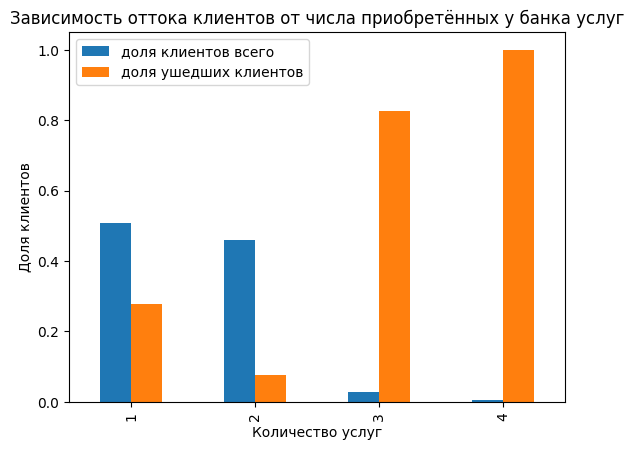

In [21]:
bar_data = churn_group_1.groupby(
    by='NumOfProducts',
    as_index=False
).agg({'Exited':['mean','count']})

client_count = churn_group_1['Exited'].count()
bar_data['NumOfProducts'] = bar_data['NumOfProducts'].astype('string')
bar_data['Exited_bar'] = bar_data['Exited']['mean']
bar_data['ExitedStr'] = bar_data['Exited']['mean'].map('{:,.4f}'.format)
bar_data['client_part'] = bar_data['Exited']['count'].apply(lambda x: x/client_count)

data={
    'доля клиентов всего': bar_data['client_part'],
    'доля ушедших клиентов': bar_data['Exited_bar']
}

index = np.arange(4)
df = pd.DataFrame(data)
df.plot(kind='bar')
plt.title('Зависимость оттока клиентов от числа приобретённых у банка услуг')
plt.xlabel('Количество услуг')
plt.ylabel('Доля клиентов')

plt.xticks(index,['1','2','3','4'])
plt.show()


Для решения задачи вполне подойдёт многоуровневая столбчатая диаграмма.
1. из диаграммы видно, что банк предлагает от одной до четырёх услуг;
2. наиболее лояльные клиенты приобрели у банка не более двух услуг;
3. клиенты, приобредшие у банка максимальное количество услуг (4) однозначно уходят;
4. клиенты, приобредшие у банка три услуги также в большинстве своём покидают банк;
5. доля клиентов, которые приобрели более двух услуг незначительна.


<center>Задание 9.8 Зависимость наличия статуса активного клиента на отток клиентов</center>

In [24]:
churn_group_1 = churn_data.copy() # создание копии данных

bar_data = churn_group_1.groupby(
    by='IsActiveMember',
    as_index=False
)[['Exited']].mean()

bar_data['IsActiveMember'] = bar_data['IsActiveMember'].apply(lambda x: 'да' if x==1 else 'нет')

bar_data['ExitedStr'] = bar_data['Exited'].map('{:,.4f}'.format)

#построение графика
labels = ['нет','да'] # категории
fig = px.bar(
     data_frame=bar_data, #датафрейм
     x='IsActiveMember', #ось x
     y="Exited", #ось y
     color='IsActiveMember', #расцветка в зависимости от количества
     text = 'ExitedStr', #текст на столбцах
     orientation='v', #ориентация графика
     height=600, #высота
     width=1000, #ширина
     title='Зависимость наличия статуса активного клиента на отток клиентов' #заголовок
)
fig.update_layout(xaxis_title='Статус активного клиента',
                  yaxis_title='Доля ушедших клиентов',
                  legend_title_text='Статус'
                )
# вывод графика
fig.show()

Из диаграммы видно, что доля ушедших неактивных клиентов почти в два раза выше доли ушедших активных клиентов.
Можно порекомендовать банку заинтересовать клиентов в получении статуса активного клиента, предложив, например, услугу, заинтересующую клиента, но доступную только для имеющих статус "активный".


<center>Задание 9.9 Доля ушедших клиентов по странам</center>

In [22]:
churn_group_1 = churn_data.copy() # создание копии данных
bar_data = churn_group_1.groupby(
    by='Geography',
    as_index=False
)[['Exited']].mean()

fig = px.choropleth(
    data_frame=bar_data, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    scope='europe', # для отображения выбрана Европа, т.к. све клиенты живут в трёх европейских странах
    color="Exited",
    range_color=[0, 1],
    title='Доля ушедших клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.show()

Из тепловой карты видно, что:
1. клиенты банка проживают в трёх европейских странах: Германия, Франция и Испания;
2. доля ушедших клиентов в Германии в два раза превышает аналогичные показатели во Франции и Испании;
3. причины большей доли ушедших клиентов в Германии могут быть связаны со следующими факторами:
    3.1. средний возраст клиентов в Германии больше, чем в других странах, а лояльны более молодые клиенты;
    3.2. в Германии доля женщин среди клиентов банка выше, а они уходят чаще;
    3.3. в Германии средний баланс у клиентов почти в два раза выше, чем в других странах.


<center>Задание 9.10 Тепловая карта категорий клиентов</center>

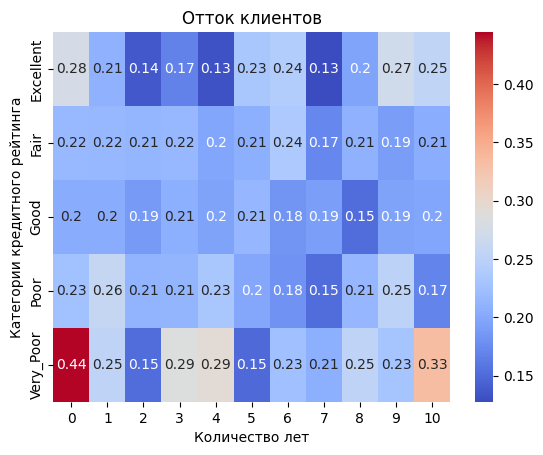

In [24]:
churn_group_1 = churn_data.copy() # создание копии данных

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

map_10 = pd.pivot_table(churn_group_1,
index = churn_group_1['CreditScore'].apply(get_credit_score_cat),
columns=['Tenure'],
values = ['Exited'],
aggfunc=['mean']
)
heatmap = sns.heatmap(data = map_10,annot=True, cmap='coolwarm')
heatmap.set(title='Отток клиентов',xlabel='Количество лет',ylabel='Категории кредитного рейтинга')
heatmap.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10],rotation=0)
plt.show()

1. Из тепловой карты видно, что наиболее часто уходят клиенты, которые являются клиентами банка менее года и имеют минимальный кредитный рейтинг (Very_Poor).
2. Второй по величине отток приходится на минимальный кредитный рейтинг и количеством лет, равным 10.
3. Чаще, чем в среднем по банку, уходят клиенты с низким кредитным рейтингом и практически любым клиентским стажем (исключение - 2 года и 5 лет).
4. Высокий отток клиентов имеется также в группе с наиболее высоким кредитным рейтингом и стажем в 1 год и 9 лет.